In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,6)

## Data Source

The dataset comes from FiveThirtyEight hosted on their GitHub, downloaded from [Kaggle](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset).

The data comes from [Marvel Wikia](https://marvel.fandom.com/wiki/Marvel_Database). 

## Data Dictionary

* page_id | The unique identifier for that characters page within the wikia 
* name | The name of the character 
* urlslug | The unique url within the wikia that takes you to the character 
* ID | The identity status of the character (Secret Identity, Public identity)
* ALIGN | If the character is Good, Bad or Neutral 
* EYE | Eye color of the character 
* HAIR | Hair color of the character 
* SEX | Sex of the character (e.g. Male, Female, etc.) 
* GSM | If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters) 
* ALIVE | If the character is alive or deceased 
* APPEARANCES | The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.) 
* FIRST APPEARANCE | The month and year of the character's first appearance in a comic book, if available 
* YEAR | The year of the character's first appearance in a comic book, if available

## Data Cleaning

In [2]:
marvel = pd.read_csv('comic-characters-dataset/marvel-data.csv')
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [3]:
marvel = marvel.drop(['page_id','urlslug'],axis = 1)

In [4]:
marvel.shape

(16376, 11)

In [5]:
marvel.dtypes

name                 object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [6]:
# check duplicated values

marvel[marvel.duplicated()]

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year


There is no duplicated values.

In [7]:
# check missing values

n_records = len(marvel)
def missing_values_col(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))
missing_values_col(marvel)

name | 0.0 | object
ID | 0.23021494870542256 | object
ALIGN | 0.17171470444553005 | object
EYE | 0.5964215925744992 | object
HAIR | 0.26038104543234003 | object
SEX | 0.052149487054225695 | object
GSM | 0.9945041524181729 | object
ALIVE | 0.00018319491939423546 | object
APPEARANCES | 0.06692721055202736 | float64
FIRST APPEARANCE | 0.04976795310210064 | object
Year | 0.04976795310210064 | float64


In [8]:
# Since there are too many missing values for the GSM column, I will drop that column.

marvel = marvel.drop(['GSM'],axis = 1)

## Data Analysis

In [9]:
marvel.sort_values(['Year']).head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
15281,Mr. Harris' Secretary (Earth-616),No Dual Identity,Neutral Characters,NaN,Blond Hair,Female Characters,Living Characters,NaN,Oct-39,1939.0
60,Human Torch (Android) (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,548.0,Oct-39,1939.0
15282,N'Jaga (Earth-616),No Dual Identity,Bad Characters,NaN,NaN,Male Characters,Living Characters,NaN,Oct-39,1939.0
10506,Tim Roberts (Earth-616),No Dual Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,1.0,Oct-39,1939.0
10505,Tex (Masked Raider) (Earth-616),NaN,Bad Characters,NaN,NaN,Male Characters,Deceased Characters,1.0,Dec-39,1939.0


The earliest Marvel character was created in 1939.

In [10]:
marvel.Year.value_counts().head()

1993.0    554
1994.0    485
1992.0    455
2006.0    381
2008.0    360
Name: Year, dtype: int64

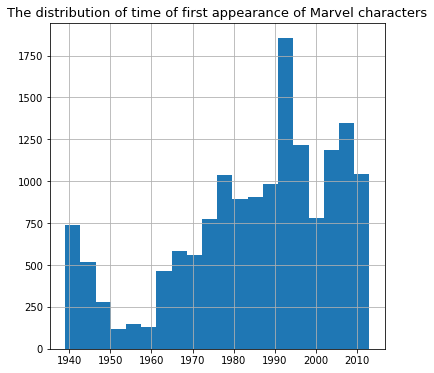

In [11]:
marvel.Year.hist(bins = 20,figsize = (6,6));
plt.title('The distribution of time of first appearance of Marvel characters',size = 13);

As we can see from the analysis above, there was a decrease in the introduction of new Marvel characters during 1950-1960. After 1960, there was a continuous increase in introduction of new characters over time, with a peak in year 1993. From 1992 to 1994, these three years have witnessed the most Marvel character creation of all time.

***

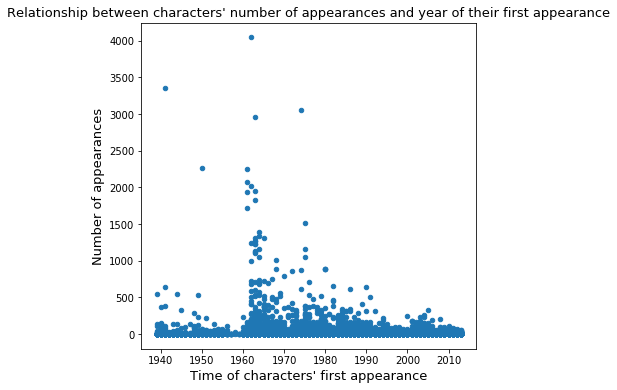

In [13]:
marvel.plot.scatter(x='Year', y='APPEARANCES',figsize = (6,6))
plt.title("Relationship between characters' number of appearances and year of their first appearance", size=13)
plt.xlabel("Time of characters' first appearance", size=13)
plt.ylabel("Number of appearances", size=13);

As shown from the scatter plot above, characters that are most frequently appeared of all time are mostly created during 1960- 1980. Let's take a look at the most frequently appeared (more than 2000 times) characters' names!

In [14]:
marvel[marvel.APPEARANCES >2000].name

0              Spider-Man (Peter Parker)
1        Captain America (Steven Rogers)
2    Wolverine (James \"Logan\" Howlett)
3      Iron Man (Anthony \"Tony\" Stark)
4                    Thor (Thor Odinson)
5             Benjamin Grimm (Earth-616)
6              Reed Richards (Earth-616)
7             Hulk (Robert Bruce Banner)
Name: name, dtype: object

***

In [15]:
by_sex = marvel.groupby('SEX').size().sort_values()
by_sex

SEX
Genderfluid Characters        2
Agender Characters           45
Female Characters          3837
Male Characters           11638
dtype: int64

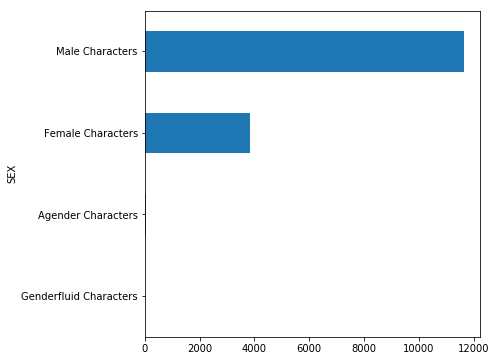

In [16]:
by_sex.plot.barh(figsize = (6,6));

As shown on the graph above, there are more than twice as many male characters as female characters. Let's take a look at characters' first appearance time and appearance frequency based on sexes.

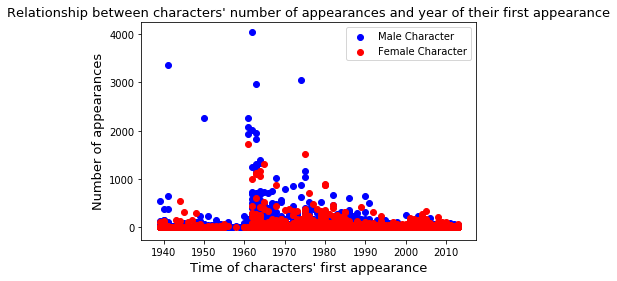

In [17]:
male = marvel[marvel.SEX == 'Male Characters']
female = marvel[marvel.SEX == 'Female Characters']

plt.scatter( x='Year', y='APPEARANCES', data=male, color = 'blue',label = 'Male Character');
plt.scatter( x='Year', y='APPEARANCES', data=female, color = 'red',label = 'Female Character');

plt.title("Relationship between characters' number of appearances and year of their first appearance", size=13)
plt.xlabel("Time of characters' first appearance", size=13)
plt.ylabel("Number of appearances", size=13);
plt.legend();

***

In [18]:
by_ID = marvel.groupby('ID').size().sort_values()
by_ALIGN = marvel.groupby('ALIGN').size().sort_values()
by_EYE = marvel.groupby('EYE').size().sort_values()
by_HAIR = marvel.groupby('HAIR').size().sort_values()

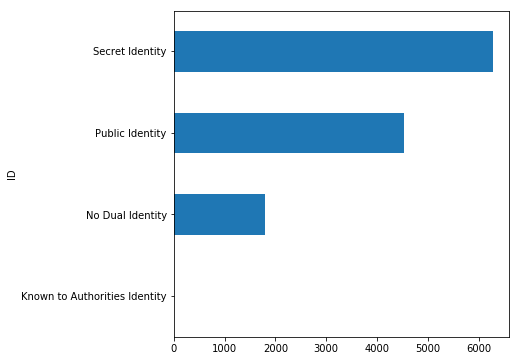

In [19]:
by_ID.plot.barh(figsize = (6,6));

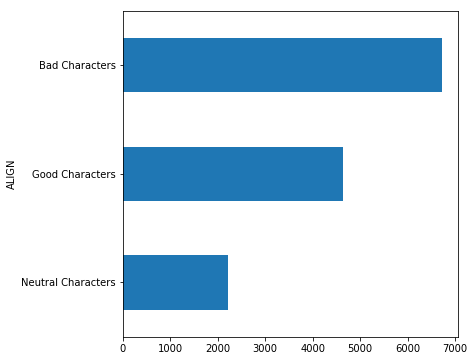

In [20]:
by_ALIGN.plot.barh(figsize = (6,6));

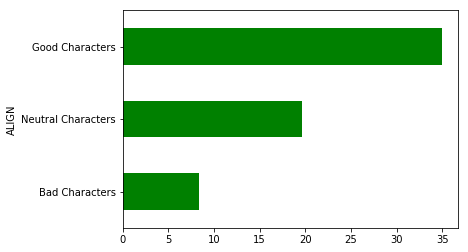

In [21]:
by_ALIGN_appearances = marvel.groupby('ALIGN')['APPEARANCES'].mean().sort_values()
by_ALIGN_appearances.plot.barh(color = 'green');

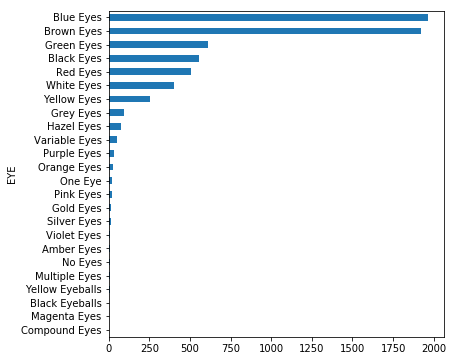

In [22]:
by_EYE.plot.barh(figsize = (6,6));

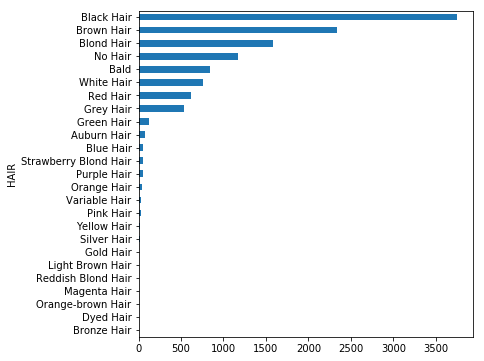

In [23]:
by_HAIR.plot.barh(figsize = (6,6));

From the four bar graphs above, we can see that:
- There are more secret identities than public identities. This makes sense because Marvel characters usually possess super power that they'd like to keep as a secret.
- There are more bad characters than good characters and more good characters than neutral characters. But on average, bad characters have least appearances, and good characters appear the most often. 
- The most common eye colors are blue and brown.
- The most common hairstyles are black, brown, and blond.